<a href="https://colab.research.google.com/github/vismitmandlik/ML/blob/main/MLlab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount( ' /gdrive ')
%cd /gdrive

In [16]:
dataset = pd.read_csv("Iris.csv")

In [17]:
X = dataset.iloc[:, 1:5].values
Y = dataset.iloc[:, 5].values

In [18]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(Y)
Y = pd.get_dummies(y1).values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
print( "X _ train is: ",X_train. shape)
print("Y_train is: ",Y_train.shape)
print("X_test is:", X_test.shape)
print( "Y_test is:",Y_test.shape)

X _ train is:  (120, 4)
Y_train is:  (120, 3)
X_test is: (30, 4)
Y_test is: (30, 3)


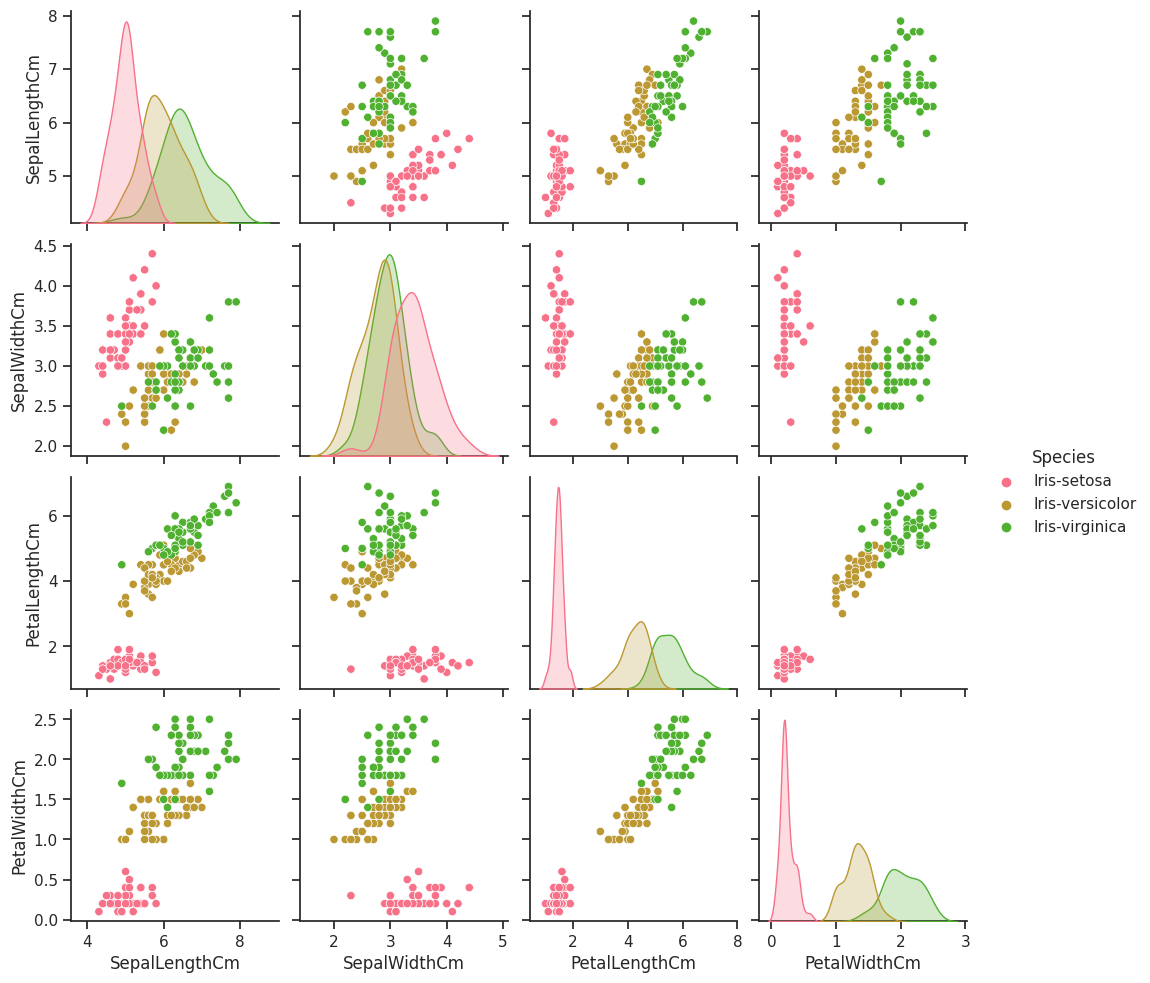

In [25]:
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[ :,1:6],hue="Species")

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [29]:
print(model . get_weights( ) )

[array([[-0.23301029, -0.23817521,  0.36574876],
       [ 0.8436142 ,  0.77282476, -0.7594183 ],
       [ 0.41832757, -0.43972495,  0.7563971 ],
       [-0.14045751,  0.15783358, -0.773343  ]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[-0.11539108, -0.72198653, -0.27980977,  0.53124386, -0.41423717],
       [-0.86043006, -0.5218705 ,  0.2652709 ,  0.8660155 , -0.30047828],
       [ 0.07817924, -0.5291215 , -0.3159989 , -0.5876374 ,  0.54961044]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[ 0.4349354 ,  0.3801368 ,  0.16524798],
       [-0.25319165,  0.35394067, -0.5518387 ],
       [ 0.45253068,  0.8457548 , -0.73528093],
       [ 0.44043857, -0.21954793,  0.1772713 ],
       [-0.12993133,  0.41177863,  0.04059803]], dtype=float32), array([0., 0., 0.], dtype=float32)]


In [30]:
model.fit(X_train, Y_train, epochs=300, batch_size=8)

Epoch 1/300
15/15 [==============================] - 1s 4ms/step - loss: 0.9487 - accuracy: 0.5417
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9219 - accuracy: 0.5750
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 0.8954 - accuracy: 0.6083
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 0.8691 - accuracy: 0.6167
Epoch 5/300
15/15 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.6167
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 0.8219 - accuracy: 0.6167
Epoch 7/300
15/15 [==============================] - 0s 4ms/step - loss: 0.7974 - accuracy: 0.6167
Epoch 8/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7740 - accuracy: 0.6167
Epoch 9/300
15/15 [==============================] - 0s 4ms/step - loss: 0.7511 - accuracy: 0.6250
Epoch 10/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.6167
Epoch 11/

In [31]:
print(model.get_weights())

[array([[-0.06110945,  0.22688419,  0.39853352],
       [ 0.81567425,  0.9542604 , -0.5815198 ],
       [ 0.00798068, -0.6211977 ,  1.3602233 ],
       [-1.1074984 , -0.7395789 ,  0.3715774 ]], dtype=float32), array([ 0.39819172,  0.69196874, -0.2325274 ], dtype=float32), array([[-0.15595591, -0.72198653,  0.24760766,  0.8602541 , -0.2974082 ],
       [-0.86043006, -0.5218705 ,  1.2946794 ,  1.5739576 , -1.2851573 ],
       [ 0.00467129, -0.5291215 , -0.06390259, -0.7324707 ,  1.1887615 ]],
      dtype=float32), array([-0.05675159,  0.        ,  0.59171647,  0.3262006 ,  0.05700711],
      dtype=float32), array([[ 0.4201379 ,  0.33125955,  0.20717517],
       [-0.25319165,  0.35394067, -0.5518387 ],
       [ 1.1895022 ,  1.7425792 , -2.0866125 ],
       [ 0.9576172 , -0.8699132 , -0.27516574],
       [-1.0116807 ,  0.07496634,  0.5946119 ]], dtype=float32), array([-0.12042352,  0.38705957, -0.33051622], dtype=float32)]


In [ ]:
scores = model.evaluate(X_test, Y_test)